In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve,roc_auc_score,classification_report,accuracy_score,confusion_matrix

In [2]:
credit_card = pd.read_csv('creditcard.csv')

Text(0.5, 0, 'Class (1==Frud)')

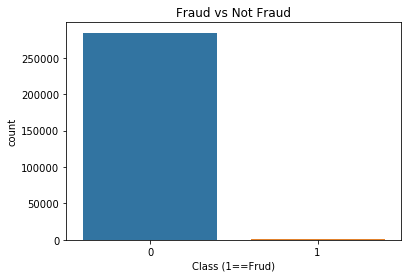

In [3]:
sns.countplot(x='Class',data=credit_card)
plt.title('Fraud vs Not Fraud')
plt.xlabel('Class (1==Frud)')

In [4]:
baseline_accuracy = 1- np.sum(credit_card.Class)/credit_card.shape[0]

In [5]:
baseline_accuracy

0.9982725143693799

In [6]:
X = credit_card.drop(columns='Class',axis=1)
y = credit_card['Class'].values

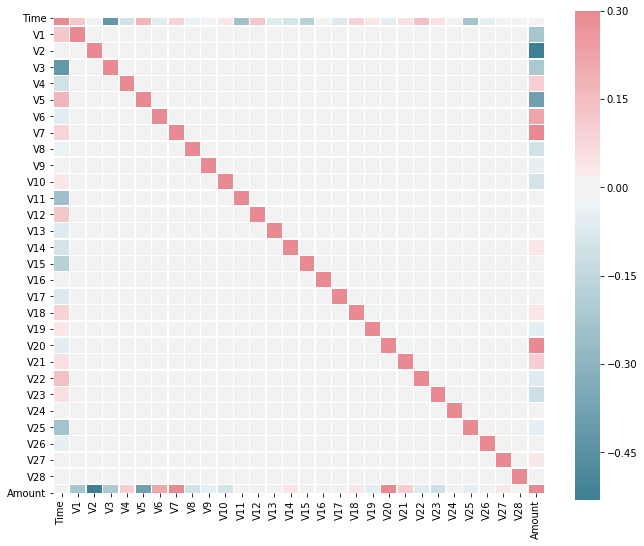

In [7]:
corr = X.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize = (11,9))
sns.heatmap(corr,cmap=cmap,vmax=0.3,center=0,square  =True,linewidth = 0.5)

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [23]:
scaler = StandardScaler()
lreg = LogisticRegression()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [24]:
lreg.fit(X_train,y_train)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [38]:
#lets find accuracy score
y_train_hat = lreg.predict(X_train)
y_train_hat_probs = lreg.predict_proba(X_train)[:,1]
train_accuracy = accuracy_score(y_train,y_train_hat)
train_auc_roc = roc_auc_score(y_train_hat,y_train_hat_probs)
print('Confusion matrix:\n',confusion_matrix(y_train,y_train_hat))
print('Train accuracy:\n',train_accuracy)
print('Train AUC:\n',train_auc_roc)




Confusion matrix:
 [[213209     24]
 [   130    242]]
Train accuracy:
 0.9992790430935605
Train AUC:
 1.0


In [40]:
y_test_hat = lreg.predict(X_test)
y_test_hat_probs = lreg.predict_proba(X_test)[:,1]
test_accuracy = accuracy_score(y_test,y_test_hat)
test_auc_roc = roc_auc_score(y_test,y_test_hat_probs)
print('Test Confusion Matrix:\n',confusion_matrix(y_test,y_test_hat))
print('Test accuracy:\n',test_accuracy)

print('Test AUC:\n',test_auc_roc)

Test Confusion Matrix:
 [[71067    15]
 [   41    79]]
Test accuracy:
 0.9992135052386169
Test AUC:
 0.9750478320812583


In [44]:
print(classification_report(y_test,y_test_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71082
           1       0.84      0.66      0.74       120

   micro avg       1.00      1.00      1.00     71202
   macro avg       0.92      0.83      0.87     71202
weighted avg       1.00      1.00      1.00     71202



In [45]:
fpr,tpr,thresholds = roc_curve(y_test,y_test_hat_probs,drop_intermediate=True)

Text(0, 0.5, 'True Positive rate')

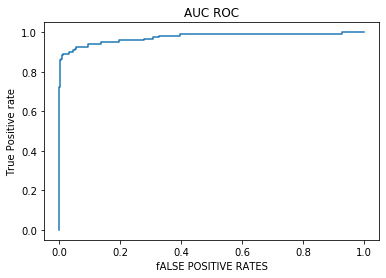

In [49]:
plt.plot(fpr,tpr)
plt.title('AUC ROC')
plt.xlabel('fALSE POSITIVE RATES')
plt.ylabel('True Positive rate')